In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [9]:
df= pd.read_csv("Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0.0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1.0,the other side of * galicismos * * galicismo *...,Safe Email
2,2.0,re : equistar deal tickets are you still avail...,Safe Email
3,3.0,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4.0,software at incredibly low prices ( 86 % lower...,Phishing Email


In [10]:
df.isna().sum()

Unnamed: 0     4
Email Text    16
Email Type     0
dtype: int64

In [11]:
df = df.dropna()
print(df.isna().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [12]:
df.shape

(18638, 3)

In [13]:
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)

Email Type
Safe Email        11326
Phishing Email     7312
Name: count, dtype: int64


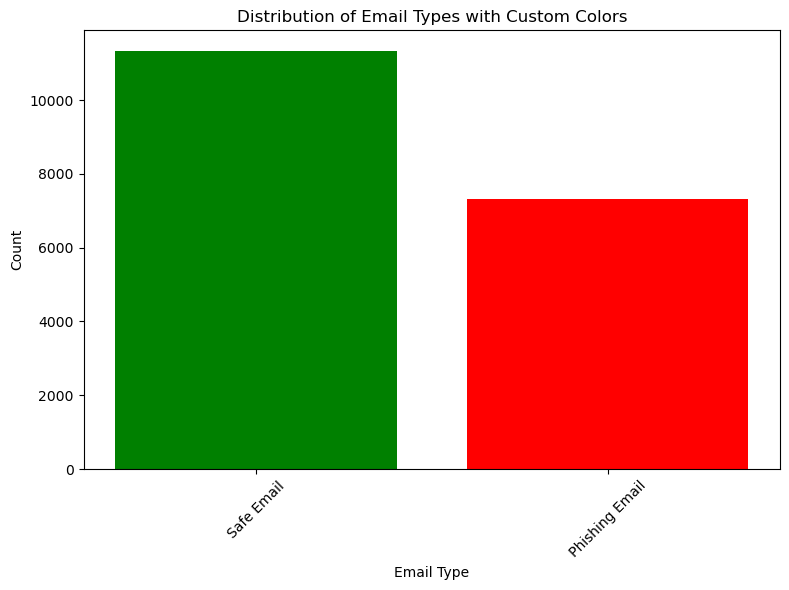

In [14]:
##### Displaying email distribution #####
unique_email_types = email_type_counts.index.tolist()

color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}


colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]


plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

In [15]:
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
# Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [16]:
Safe_Email.shape,Phishing_Email.shape

((11326, 3), (7312, 3))

In [17]:
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data.head()

,Unnamed: 0,Email Text,Email Type
0,0.0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1.0,the other side of * galicismos * * galicismo *...,Safe Email
2,2.0,re : equistar deal tickets are you still avail...,Safe Email
3,5.0,global risk management operations sally congra...,Safe Email
4,6.0,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email


In [18]:
Data.tail()

,Unnamed: 0,Email Text,Email Type
18633,18635.0,congratulations you have won ! ! ! pls contact...,Phishing Email
18634,18638.0,empty,Phishing Email
18635,18639.0,strong buy alert : monthly newsletter topstock...,Phishing Email
18636,18646.0,date a lonely housewife always wanted to date ...,Phishing Email
18637,18650.0,empty,Phishing Email


In [19]:
X = Data["Email Text"].values
y = Data["Email Type"].values

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)

###### Model => RandomForestClassifier
Test Accuracy : 93.75000%
Classification Report
                precision    recall  f1-score   support

Phishing Email       0.92      0.92      0.92      1482
    Safe Email       0.95      0.95      0.95      2246

      accuracy                           0.94      3728
     macro avg       0.93      0.93      0.93      3728
  weighted avg       0.94      0.94      0.94      3728

Confusion Matrix


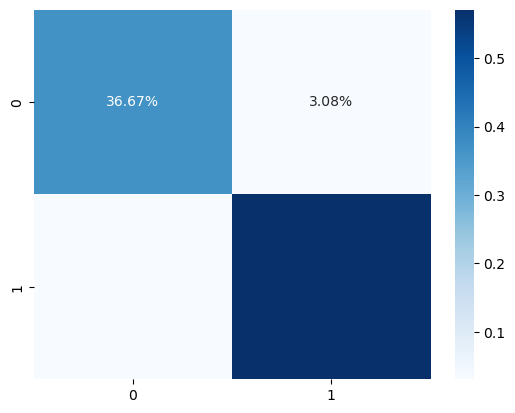

################### End ###################
###### Model => DecisionTreeClassifier
Test Accuracy : 91.49678%
Classification Report
                precision    recall  f1-score   support

Phishing Email       0.89      0.90      0.89      1482
    Safe Email       0.93      0.92      0.93      2246

      accuracy                           0.91      3728
     macro avg       0.91      0.91      0.91      3728
  weighted avg       0.92      0.91      0.92      3728

Confusion Matrix


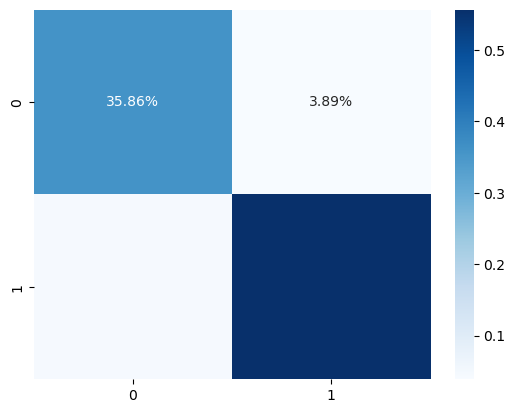

################### End ###################
###### Model => AdaBoostClassifier
Test Accuracy : 92.51609%
Classification Report
                precision    recall  f1-score   support

Phishing Email       0.89      0.92      0.91      1482
    Safe Email       0.95      0.93      0.94      2246

      accuracy                           0.93      3728
     macro avg       0.92      0.93      0.92      3728
  weighted avg       0.93      0.93      0.93      3728

Confusion Matrix


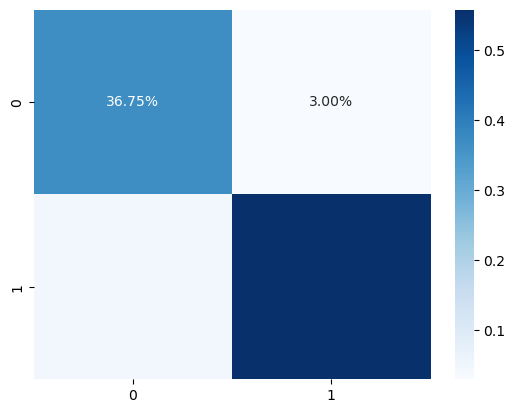

################### End ###################
###### Model => SGDClassifier
Test Accuracy : 98.04185%
Classification Report
                precision    recall  f1-score   support

Phishing Email       0.97      0.98      0.98      1482
    Safe Email       0.99      0.98      0.98      2246

      accuracy                           0.98      3728
     macro avg       0.98      0.98      0.98      3728
  weighted avg       0.98      0.98      0.98      3728

Confusion Matrix


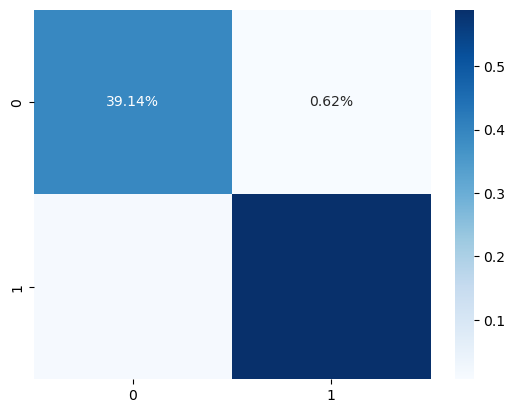

################### End ###################
###### Model => LogisticRegression
Test Accuracy : 97.50536%
Classification Report
                precision    recall  f1-score   support

Phishing Email       0.96      0.97      0.97      1482
    Safe Email       0.98      0.98      0.98      2246

      accuracy                           0.98      3728
     macro avg       0.97      0.97      0.97      3728
  weighted avg       0.98      0.98      0.98      3728

Confusion Matrix


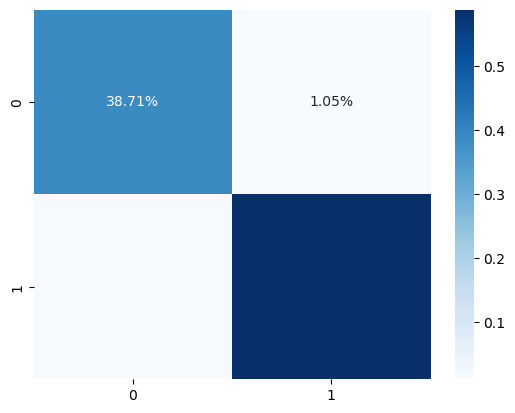

################### End ###################


In [21]:
import joblib
models = [
    (Pipeline([("tfidf", TfidfVectorizer()), ("classifier", RandomForestClassifier())]), {'classifier__n_estimators': [10]}),
    (Pipeline([("tfidf", TfidfVectorizer()), ("classifier", DecisionTreeClassifier())]), {'classifier__max_depth': [None, 10]}),
    (Pipeline([("tfidf", TfidfVectorizer()), ("classifier", AdaBoostClassifier())]), {'classifier__n_estimators': [50], 'classifier__learning_rate': [1.0]}),
    (Pipeline([("tfidf", TfidfVectorizer()), ("classifier", SGDClassifier())]), {'classifier__max_iter': [1000], 'classifier__tol': [1e-3]}),
    (Pipeline([("tfidf", TfidfVectorizer()), ("classifier", LogisticRegression())]), {'classifier__C': [1.0], 'classifier__max_iter': [100]})
]

accuracy_test = []
model_names = []

for pipeline, params in models:
    model_name = pipeline.steps[-1][1].__class__.__name__
    print(f'###### Model => {model_name}')
    
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Access the fitted TfidfVectorizer from the best estimator's pipeline
    tfidf_vectorizer = grid_search.best_estimator_.named_steps['tfidf']
    # Save the fitted TfidfVectorizer
    joblib.dump(tfidf_vectorizer, f'Vectorizers/{model_name}_vectorizer.joblib')
    
    best_model = grid_search.best_estimator_
    
    # Save the model
    joblib.dump(best_model, f'Classifiers/{model_name}.joblib')
    
    pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracy_test.append(acc)
    model_names.append(model_name)
    
    print(f'Test Accuracy : {acc*100:.5f}%')
    print('Classification Report')
    print(classification_report(y_test, pred))
    print('Confusion Matrix')
    cf_matrix = confusion_matrix(y_test, pred)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.show()
    print('################### End ###################')

In [22]:
model_series = pd.Series(model_names, name='Model').astype(str)  
accuracy_series = pd.Series(accuracy_test, name='Accuracy')  
output = pd.concat([model_series, accuracy_series], axis=1)

In [23]:
output

,Model,Accuracy
0,RandomForestClassifier,0.937500
1,DecisionTreeClassifier,0.914968
2,AdaBoostClassifier,0.925161
3,SGDClassifier,0.980418
4,LogisticRegression,0.975054


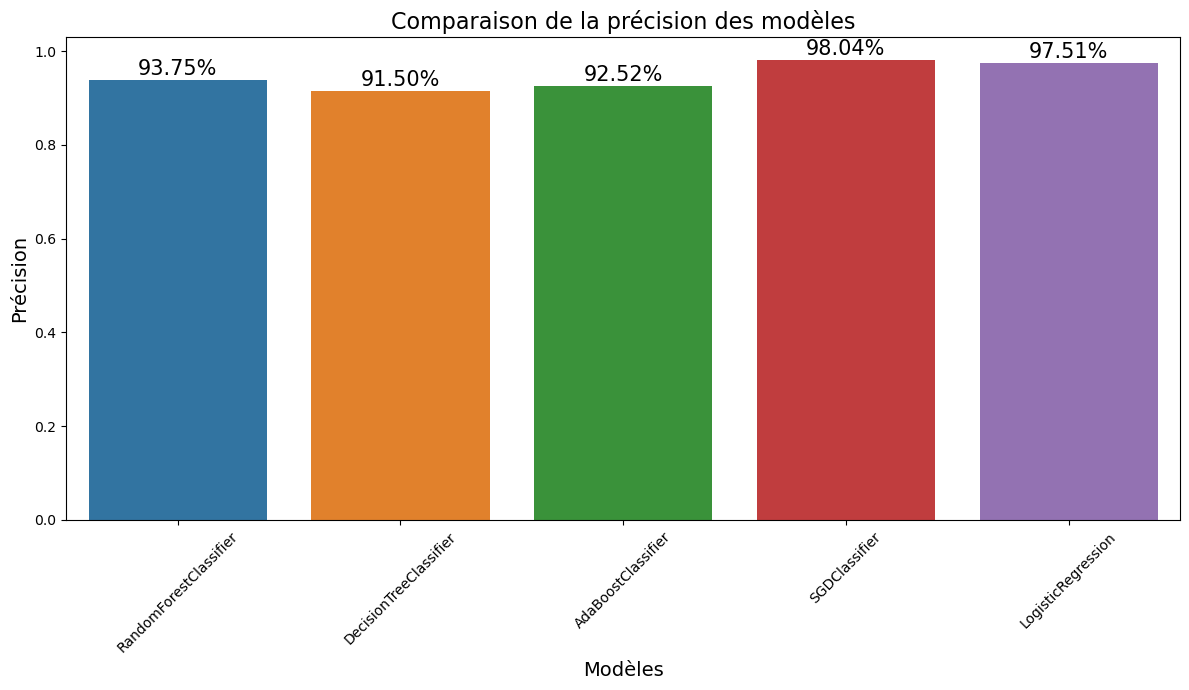

In [24]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Accuracy', data=output)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2%'), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Modèles", fontsize=14)
plt.ylabel("Précision", fontsize=14)
plt.title("Comparaison de la précision des modèles", fontsize=16)  
plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()

In [18]:
import glob
from joblib import load
test = ['''
Dear Customer,

We have detected unusual activity on your account and suspect an unauthorized transaction attempt. As a precaution, we have temporarily suspended your account access.

To verify your identity and reactivate your account, please click on the link below and follow the instructions:

Verify My Account

Failure to complete the verification within 24 hours will result in permanent account suspension.

Thank you for your prompt attention to this matter.

Best regards,
Customer Support Team
''']
# Load all .joblib model files
vectorizer_files = glob.glob('*_vectorizer.joblib')

for vectorizer_file in vectorizer_files:
    
    
    # Identify the corresponding vectorizer file
    model_file = vectorizer_file.replace('_vectorizer.joblib', '.joblib')
    
    # Load the model
    model = load(model_file)
    
    # Load the vectorizer
    vectorizer = load(vectorizer_file)
    
    # Check if the model has the predict_proba method
    if hasattr(model, 'predict_proba'):
        # Make predictions with the model
        predictions = model.predict(test)
    
        # Get probabilities with the model
        probabilities = model.predict_proba(test)

        print(f'Model: {model_file}')
        for i, input_string in enumerate(test):
            print(f'Prediction: {predictions[i]}, Certainty: {np.max(probabilities[i]):.4f}')
    else:
        print(f'Model: {model_file} does not support probability estimates')
        # Make predictions with the model
        predictions = model.predict(test)
        for i, input_string in enumerate(test):
            print(f'Nonetheless, the prediction is: {predictions[i]}')
        

    


Model: AdaBoostClassifier.joblib
Prediction: Phishing Email, Certainty: 0.5146
Model: LogisticRegression.joblib
Prediction: Phishing Email, Certainty: 0.9626
Model: RandomForestClassifier.joblib
Prediction: Phishing Email, Certainty: 0.8000
Model: SGDClassifier.joblib does not support probability estimates
Nonetheless, the prediction is: Phishing Email
Model: DecisionTreeClassifier.joblib
Prediction: Phishing Email, Certainty: 1.0000
